In [1]:
from collections import Counter
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
%matplotlib inline

TEST

In [2]:
clt = KMeans(n_clusters=10)

In [3]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [4]:
image = io.imread('~/Desktop/selam.png')
image_arr = np.array(image)
image_arr = np.reshape(image_arr, (-1, 4))
image_arr = image_arr[image_arr[:,3] > 50][:,:3]


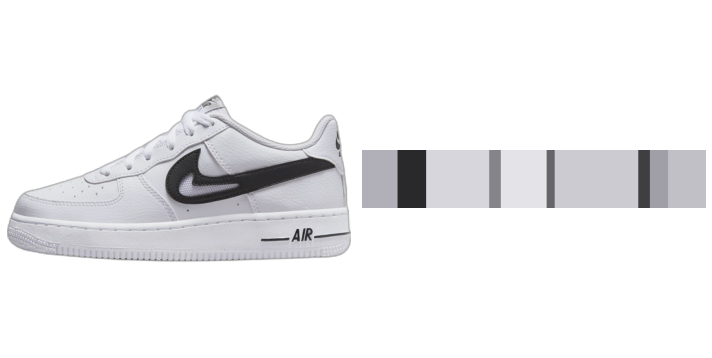

In [5]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette, k_cluster.cluster_centers_, perc
    
clt_1 = clt.fit(image_arr.reshape(-1, 3))
palette, colors, percentage = palette_perc(clt_1) 
show_img_compar(image, palette)


In [6]:
def color_pair_score(color1, color2):
    color1 = np.array(color1)
    color2 = np.array(color2)
    color_distance = np.linalg.norm(color1 - color2)
    return -color_distance**2


In [7]:
def create_score_matrix(color_arr_1, color_arr_2):
    score_arr = np.zeros((len(color_arr_1), len(color_arr_2)))
    for x, color1 in enumerate(color_arr_1):
        for y, color2 in enumerate(color_arr_2):
            score = color_pair_score(color1, color2)
            score_arr[x, y] = score
    return score_arr
    
color_pair_matrix = create_score_matrix(colors, colors)


In [8]:
N = 10
def wPrefersM1OverM(color_pair_matrix, w, m, m1):
    if(color_pair_matrix[w][m1] > color_pair_matrix[w][m]):
         return True
    else:
        return False


In [9]:
def find_color_pairs(color_pair_matrix):
     
    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]
 
    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]
 
    freeCount = N
 
    # While there are free men
    while (freeCount > 0):
         
        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1
 
        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        m_pref = np.flip(np.argsort(color_pair_matrix[:, m]))
        while i < N and mFree[m] == False:
            w = m_pref[i]
 
            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w] == -1):
                wPartner[w] = m
                mFree[m] = True
                freeCount -= 1
 
            else:
                 
                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w]
 
                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(color_pair_matrix, w, m, m1) == False):
                    wPartner[w] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
 
            # End of Else
        # End of the for loop that goes
        # to all women in m's list
    # End of main while loop
 
    # Print solution
    return wPartner
        
img1_pairs = find_color_pairs(color_pair_matrix)

In [10]:
def color_similarity_score(img1_pairs, color_pair_matrix, img_per_1, img_per_2):
    score = 0
    for i, m in enumerate(img1_pairs):
        score += color_pair_matrix[i, m] * img_per_1[i] * img_per_2[m]
    return score

score = color_similarity_score(img1_pairs, color_pair_matrix, percentage, percentage)  
  

AUTOMATION

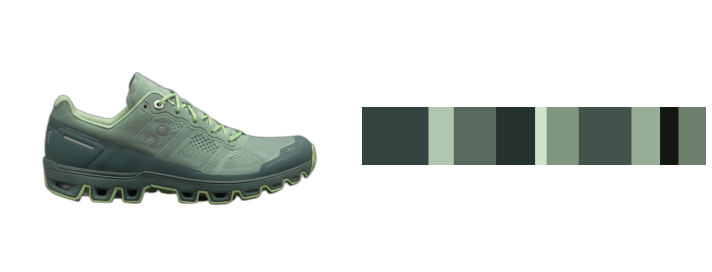

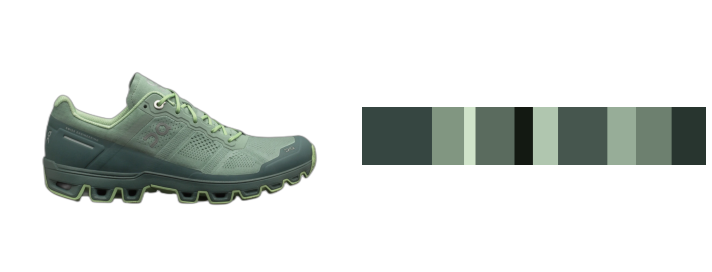

/var/folders/mn/pb5mjrt51x978v3d_w31p7kc0000gn/T/ipykernel_11846/3754056454.py:28: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  image_list = np.array(image_list, dtype=object)


In [13]:
from PIL import Image
import glob
image_list = []
percentage_list = []
colors_list = []
filename_list = []
for filename in glob.glob('/Users/cemkilinc/Desktop/test_out/*.png'): #assuming gif
    img=Image.open(filename)
    
    img_arr = np.array(img)
    img_arr = np.reshape(img, (-1, 4))
    img_arr = img_arr[img_arr[:,3] > 50][:,:3]
    
    clt = KMeans(n_clusters=10)
    clt_1 = clt.fit(img_arr.reshape(-1, 3))

    palette, colors, percentage = palette_perc(clt_1)   
    show_img_compar(img, palette)

    filename_list.append(filename)
    image_list.append(img)
    percentage_list.append(percentage)
    colors_list.append(colors)
    

image_list = np.array(image_list, dtype=object)
percentage_list = np.array(percentage_list, dtype=object)
colors_list = np.array(colors_list, dtype=object)

In [14]:
number_of_images = len(image_list)

for i in range(number_of_images):
    for j in range(i+1, number_of_images):
        #print(str(i) + " " + str(j))

        color_arr_1 = colors_list[i]
        percentage_1 = percentage_list[i]
        color_arr_2 = colors_list[j]
        percentage_2 = percentage_list[j]

        color_pair_matrix = create_score_matrix(color_arr_1, color_arr_2)
        img1_pairs = find_color_pairs(color_pair_matrix)
        score = color_similarity_score(img1_pairs, color_pair_matrix, percentage_1, percentage_2)  
        
        print(filename_list[i] + " and " + filename_list[j] + " similarity score: " + str(score))
        


/Users/cemkilinc/Desktop/test_out/4.png and /Users/cemkilinc/Desktop/test_out/5.png similarity score: 0.0


IndexError: list index out of range